In [8]:
import pycaret
import sklearn
import pandas
import numpy

print(f"PyCaret version: {pycaret.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Scikit-learn version: {pandas.__version__}")
print(f"Scikit-learn version: {numpy.__version__}")

PyCaret version: 3.3.2
Scikit-learn version: 1.4.2
Scikit-learn version: 2.1.4
Scikit-learn version: 1.26.4


In [1]:
import pandas as pd
df = pd.read_csv('./data/train.csv').drop(columns=['id'])
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,1,1,9238,1,1,126.0,1,1,19,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,17,1,9238,1,1,125.0,1,19,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,1,17,2,9254,1,1,137.0,1,3,19,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,1,1,3,9500,1,1,131.0,1,19,3,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,1,1,2,9500,1,1,132.0,1,19,37,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


In [4]:
df.Target.value_counts()

Target
Graduate    36282
Dropout     25296
Enrolled    14940
Name: count, dtype: int64

In [2]:
# Import necessary libraries
from pycaret.classification import setup, compare_models, create_model, tune_model, plot_model, evaluate_model, finalize_model, predict_model, save_model, load_model

# Configuración del experimento
exp_pc01 = setup(data=df, 
                   target='Target', 
                   session_id=123, 
                   train_size=0.7
                   )

,Description,Value
0,Session id,123
1,Target,Target
2,Target type,Multiclass
3,Target mapping,"Dropout: 0, Enrolled: 1, Graduate: 2"
4,Original data shape,"(76518, 37)"
5,Transformed data shape,"(76518, 37)"
6,Transformed train set shape,"(53562, 37)"
7,Transformed test set shape,"(22956, 37)"
8,Numeric features,36
9,Preprocess,True


In [5]:
# Comparación de modelos
best_model = compare_models(sort = 'AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8293,0.9432,0.8293,0.8288,0.8278,0.7251,0.7265,0.5020
rf,Random Forest Classifier,0.8248,0.9378,0.8248,0.8235,0.8227,0.7174,0.7191,0.8640
et,Extra Trees Classifier,0.8230,0.9363,0.8230,0.8218,0.8206,0.7141,0.7161,0.9540
nb,Naive Bayes,0.7661,0.8912,0.7661,0.7599,0.7603,0.6195,0.6225,0.0770
knn,K Neighbors Classifier,0.7280,0.8534,0.7280,0.7224,0.7241,0.5608,0.5620,0.9220
dt,Decision Tree Classifier,0.7404,0.8030,0.7404,0.7435,0.7418,0.5882,0.5883,0.1240
dummy,Dummy Classifier,0.4742,0.5000,0.4742,0.2248,0.3050,0.0000,0.0000,0.0550
lr,Logistic Regression,0.7896,0.0000,0.7896,0.7888,0.7861,0.6589,0.6623,3.8930
svm,SVM - Linear Kernel,0.6086,0.0000,0.6086,0.6917,0.5587,0.4138,0.4710,1.2720
ridge,Ridge Classifier,0.7934,0.0000,0.7934,0.7891,0.7799,0.6565,0.6691,0.0720


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [6]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


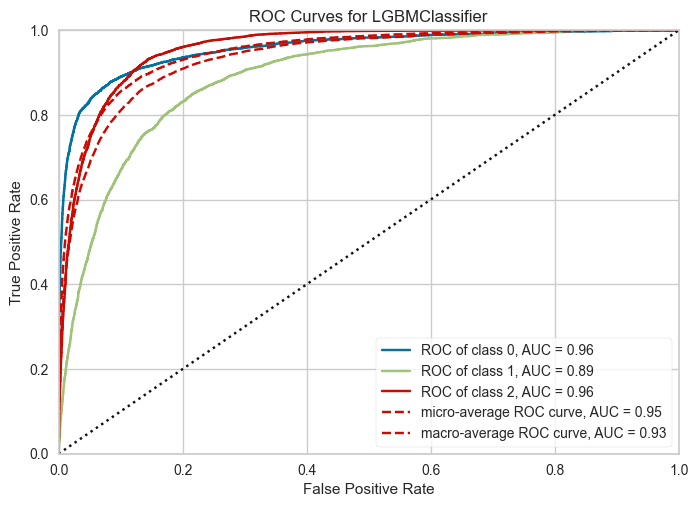

In [7]:
exp_pc01.plot_model(best_model, plot = 'auc')

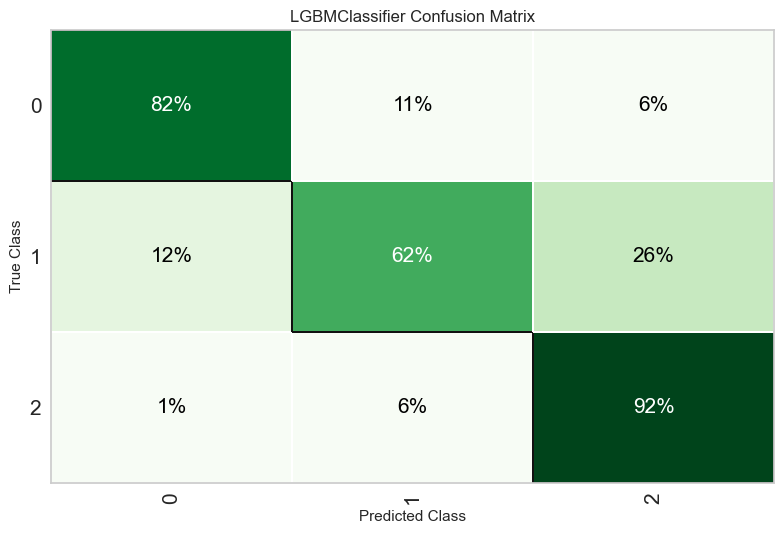

In [17]:
exp_pc01.plot_model(best_model, 
                plot = 'confusion_matrix', 
                plot_kwargs = {'percent' : True},
                #save = True
                )

In [14]:
# Create and tune the best model
tuned_model_better = tune_model(best_model, n_iter = 50, choose_better = True)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8365,0.9477,0.8365,0.8352,0.8350,0.7371,0.7380
1,0.8251,0.9434,0.8251,0.8224,0.8226,0.7179,0.7192
2,0.8206,0.9400,0.8206,0.8193,0.8186,0.7106,0.7122
3,0.8428,0.9500,0.8428,0.8423,0.8414,0.7471,0.7483
4,0.8307,0.9450,0.8307,0.8286,0.8286,0.7272,0.7284
5,0.8325,0.9429,0.8325,0.8285,0.8287,0.7289,0.7309
6,0.8351,0.9448,0.8351,0.8340,0.8335,0.7345,0.7358
7,0.8327,0.9441,0.8327,0.8326,0.8315,0.7309,0.7322
8,0.8338,0.9446,0.8338,0.8321,0.8319,0.7323,0.7336


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [15]:
print(tuned_model_better)

LGBMClassifier(bagging_fraction=0.6, bagging_freq=2, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.4,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=41, min_child_weight=0.001, min_split_gain=0.9,
               n_estimators=260, n_jobs=-1, num_leaves=70, objective=None,
               random_state=123, reg_alpha=2, reg_lambda=3, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


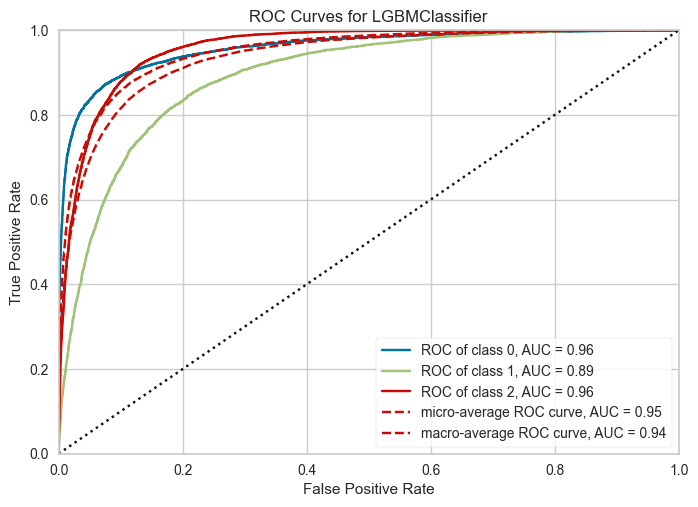

In [16]:
exp_pc01.plot_model(tuned_model_better, plot = 'auc')

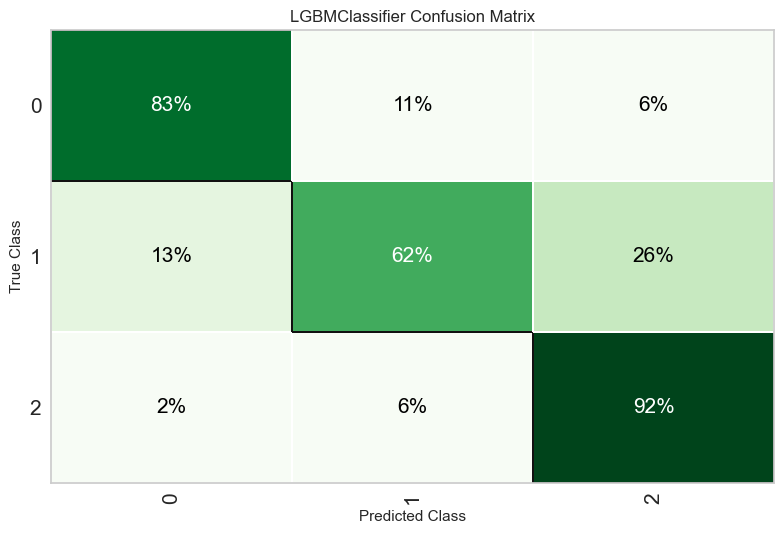

In [19]:
exp_pc01.plot_model(tuned_model_better, 
                plot = 'confusion_matrix', 
                plot_kwargs = {'percent' : True},
                #save = True
                )

In [31]:
from pycaret.classification import *

In [24]:
# Finalizar el modelo
final_model = finalize_model(tuned_model_better)

In [37]:
print(final_model)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Marital status',
                                             'Application mode',
                                             'Application order', 'Course',
                                             'Daytime/evening attendance',
                                             'Previous qualification',
                                             'Previous qualification (gra...
                                boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, feature_fraction=0.4,
                                importance_type='split', learning_rate=0.1,
                                ma

In [25]:
df_test = pd.read_csv('./data/test.csv')

In [26]:
# Realizar predicciones
predictions = predict_model(final_model, data=df_test)

[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] feature_fraction is set=0.4, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4
[LightGBM] [Warning] bagging_fraction is set=0.6, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


In [27]:
predictions

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,prediction_label,prediction_score
0,76518,1,1,1,9500,1,1,141.000000,1,3,...,8,0,0,0.000000,0,13.9,-0.3,0.79,Dropout,0.9936
1,76519,1,1,1,9238,1,1,128.000000,1,1,...,6,6,6,13.500000,0,11.1,0.6,2.02,Graduate,0.9843
2,76520,1,1,1,9238,1,1,118.000000,1,1,...,6,11,5,11.000000,0,15.5,2.8,-4.06,Graduate,0.7479
3,76521,1,44,1,9147,1,39,130.000000,1,1,...,8,14,5,11.000000,0,8.9,1.4,3.51,Graduate,0.4481
4,76522,1,39,1,9670,1,1,110.000000,1,1,...,6,9,4,10.666667,2,7.6,2.6,0.32,Enrolled,0.6204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51007,127525,1,1,2,171,1,1,128.000000,1,38,...,0,0,0,0.000000,0,15.5,2.8,-4.06,Dropout,0.8895
51008,127526,2,39,1,9119,1,19,133.100006,1,19,...,5,5,0,0.000000,0,9.4,-0.8,-3.12,Dropout,0.9918
51009,127527,1,1,1,171,1,1,127.000000,1,1,...,0,0,0,0.000000,0,15.5,2.8,-4.06,Dropout,0.9837
51010,127528,1,1,3,9773,1,1,132.000000,1,19,...,6,9,3,13.000000,0,7.6,2.6,0.32,Dropout,0.9080


In [34]:
# Create a DataFrame with 'id' and prediction_label
result = pd.DataFrame({
    'id': df_test['id'],
    'Target': predictions['prediction_label']
})

# Save the result to a CSV file
result.to_csv('./submission_0.csv', index=False)

In [29]:
# Guardar modelo 
save_model(final_model, 'modelo_final_pc01')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Marital status',
                                              'Application mode',
                                              'Application order', 'Course',
                                              'Daytime/evening attendance',
                                              'Previous qualification',
                                              'Previous qualification (gra...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.4,
                                 importance_type='split', learning_rate=0.1,
                   